In [1]:
import os
import itertools, collections
import numpy, scipy, pandas
import scipy.signal
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from imp import reload

from pgtools import toolbox, myplots
import pygbrowse
import empdist
from empdist import EmpiricalDistribution
from peas import scoring, arrayfuncs

In [2]:
seaborn.set_style('darkgrid')

In [3]:
reload(empdist)
reload(arrayfuncs)
reload(scoring)

<module 'peas.scoring' from '/gpfs/data01/glasslab/home/dskola/workspace/PEAS/peas/scoring.py'>

In [5]:
n=1000000
data_distro = scipy.stats.gumbel_r
test_data = data_distro().rvs(n)

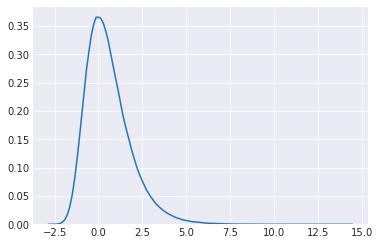

In [6]:
seaborn.kdeplot(test_data)

In [36]:
def heatmap_centered_cmap(data, heatmap_kwargs={}):
    extent = numpy.max(numpy.abs(data))
    seaborn.heatmap(data, vmin=-extent, vmax=extent, cmap='RdBu_r', **heatmap_kwargs)

14.25251987782497


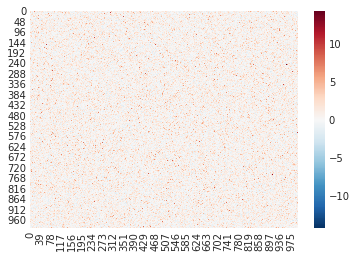

In [39]:
test_matrix = test_data.reshape(1000,1000)
heatmap_centered_cmap(test_matrix)

## Mean

11.409063895324099


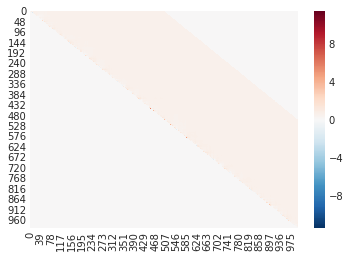

In [37]:
ground_truth_means = scoring.compute_mean_table_2d(test_matrix, start_diagonal=1, end_diagonal=500)
heatmap_centered_cmap(ground_truth_means)

In [146]:
%%time
ground_truth_shuffled_means = peas.scoring.generate_permuted_matrix_scores(test_matrix, 
                                                                      num_shuffles=10,
                                                                      min_region_size=2,
                                                                      max_region_size=500,
                                                                      start_diagonal=1,
                                                                      matrix_score_func=scoring.compute_mean_table_2d,
                                                                      random_seed=1,
                                                                     )

2018-Aug-25 17:51:18			Setting random seed to 1
2018-Aug-25 17:51:18				permutation 1 of 10
CPU times: user 909 ms, sys: 13 ms, total: 922 ms
Wall time: 919 ms


## Development Break

In [149]:
import peas.scoring
reload(peas.scoring)
from peas.scoring import *

In [134]:
x = test_matrix.copy()
numpy.random.shuffle(x)

<module 'peas.scoring' from '/gpfs/data01/glasslab/home/dskola/workspace/PEAS/peas/scoring.py'>

In [136]:
for k in range(0,500):
    print(k, numpy.sum(numpy.less(numpy.abs(numpy.diag(test_matrix, k)), 1e-5)))

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 1
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 1
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 1
168 0
169 1
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0


## Basic method (appending lists)

In [152]:
def zero_count(arr):
    return numpy.sum(numpy.less(numpy.abs(arr), 1e-8))

In [213]:
%%time
reload(peas.scoring)
ground_truth_shuffled_means = peas.scoring.generate_permuted_matrix_scores(test_matrix, 
                                                                      num_shuffles=1000,
                                                                      min_region_size=2,
                                                                      max_region_size=500,
                                                                      start_diagonal=1,
                                                                      matrix_score_func=scoring.compute_mean_table_2d,
                                                                      random_seed=1,
                                                                     )

ground_truth_shuffled_means = {sample_size:numpy.sort(ground_truth_shuffled_means[sample_size]) for sample_size in ground_truth_shuffled_means}

2018-Aug-27 11:27:54			Setting random seed to 1
2018-Aug-27 11:27:54				permutation 1 of 1000
2018-Aug-27 11:27:59				permutation 55 of 1000
2018-Aug-27 11:28:04				permutation 102 of 1000
2018-Aug-27 11:28:09				permutation 149 of 1000
2018-Aug-27 11:28:14				permutation 199 of 1000
2018-Aug-27 11:28:19				permutation 249 of 1000
2018-Aug-27 11:28:25				permutation 299 of 1000
2018-Aug-27 11:28:30				permutation 349 of 1000
2018-Aug-27 11:28:35				permutation 399 of 1000
2018-Aug-27 11:28:40				permutation 448 of 1000
2018-Aug-27 11:28:45				permutation 497 of 1000
2018-Aug-27 11:28:50				permutation 547 of 1000
2018-Aug-27 11:28:55				permutation 597 of 1000
2018-Aug-27 11:29:00				permutation 647 of 1000
2018-Aug-27 11:29:05				permutation 698 of 1000
2018-Aug-27 11:29:10				permutation 749 of 1000
2018-Aug-27 11:29:15				permutation 800 of 1000
2018-Aug-27 11:29:20				permutation 851 of 1000
2018-Aug-27 11:29:25				permutation 902 of 1000
2018-Aug-27 11:29:30				permutation 952 of 

2 999000


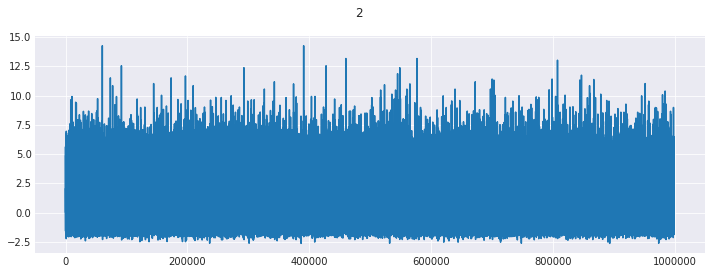

4 997000


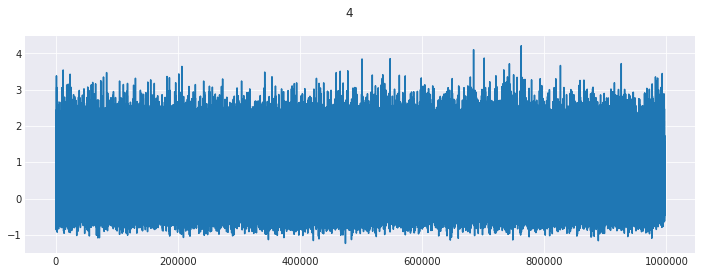

5 996000


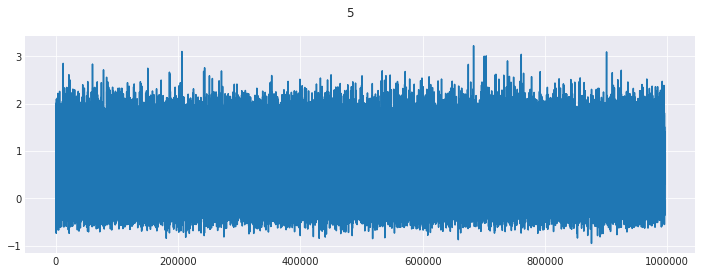

10 991000


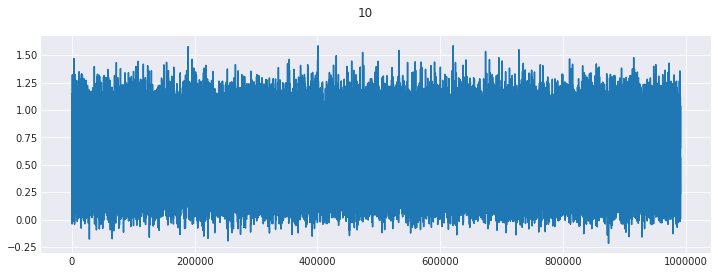

50 951000


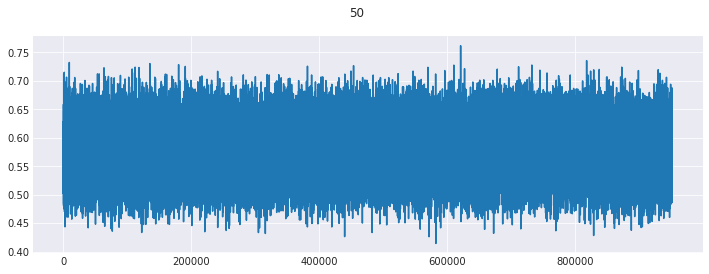

100 901000


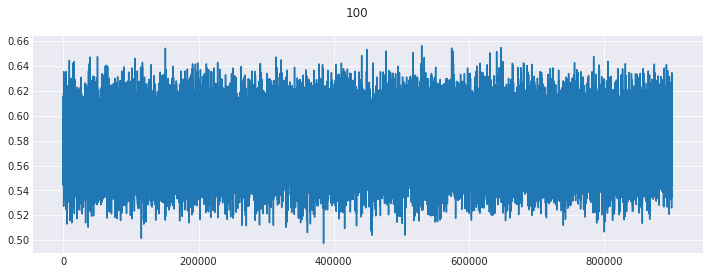

250 751000


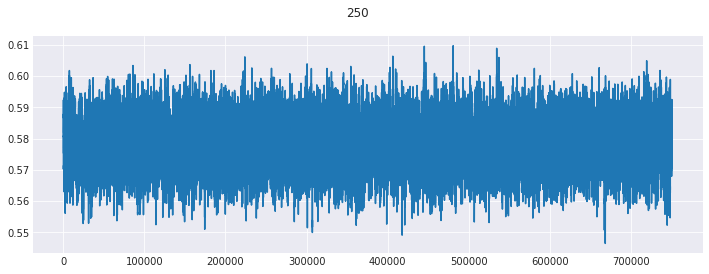

500 501000


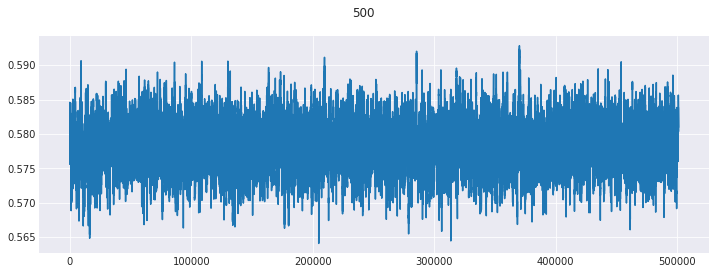

In [214]:
for region_size in [2,4,5,10,50,100,250,500]:
    data = ground_truth_shuffled_means[region_size]
    print(region_size, len(data))
    fig, ax = plt.subplots(1, figsize=(12,4))
    ax.plot(data)
    fig.suptitle(region_size)
    plt.show()

In [216]:
for region_size, data in sorted(ground_truth_shuffled_means.items()):
    print(region_size, zero_count(data))

2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0
185 0
18

## Things to try:
1. Estimate the variance of the estimate of empirical -10 log pvalue as a function of data points and query value using the standard error of the proportion and verify using empirical down-sampling.
2. Use this information to automagically pick the right tail cutoff to use for estimation
3. Try direct fitting to endpoint constraining inflection point to mean.
4. Try numerical optimization of slope, constraining inflection point to mean
5. Look at filtering:
    1. None
    2. Savitsky-Golay
    3. Window averaging (convolve with vector of 1s).
 

In [225]:
def sep(p, n):
    return numpy.sqrt(p * (1-p) / n)

def se_pscore(p, n):
    return -10 * numpy.log(sep(p=p,n=n))

In [218]:
sep(0.5, 36)

0.08333333333333333

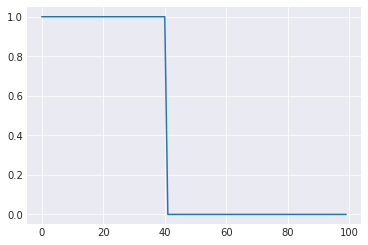

In [235]:
plt.plot(empirical_pvals)

In [246]:
len(this_data)

997000

In [245]:
numpy.sqrt(1e-6 / len(this_data))

1.0015033834597082e-06

In [244]:
empirical_pvals

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.99998997e-01, 9.99994985e-01, 9.99983952e-01,
       9.99943832e-01, 9.99841525e-01, 9.99642929e-01, 9.99129389e-01,
       9.98235709e-01, 9.96516553e-01, 9.93535613e-01, 9.88702118e-01,
       9.81127401e-01, 9.69803441e-01, 9.54011079e-01, 9.32815514e-01,
       9.06070305e-01, 8.72748372e-01, 8.33055333e-01, 7.87966110e-01,
       7.37625138e-01, 6.82873939e-01, 6.25734578e-01, 5.66584186e-01,
       5.07061678e-01, 4.48945387e-01, 3.92559285e-01, 3.40218315e-01,
       2.91423981e-01, 2.47969661e-01, 2.08233492e-01, 1.73297720e-01,
       1.43015905e-01, 1.16783233e-01, 9.47601858e-02, 7.61664231e-02,
       6.03580137e-02, 4.78254285e-02, 3.75957497e-02, 2.93871320e-02,
      

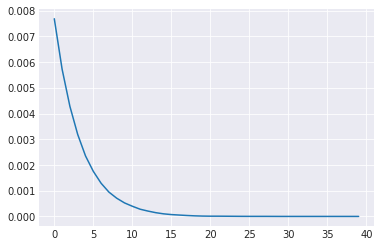

In [243]:
plt.plot(empirical_pvals[60:])

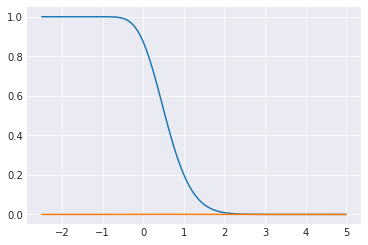

In [254]:
standard_error = sep(empirical_pvals, len(this_data))
plt.plot(xs, empirical_pvals)
plt.plot(xs, standard_error)

/home/dskola/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning:

divide by zero encountered in log

/home/dskola/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning:

divide by zero encountered in log



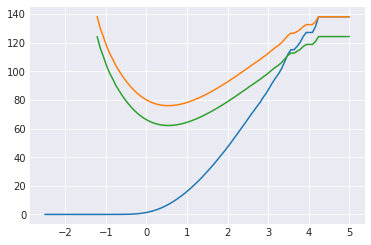

In [258]:
standard_error = sep(empirical_pvals, len(this_data))
conf_95_width = 4 * standard_error
plt.plot(xs, -10 * numpy.log(empirical_pvals))
plt.plot(xs, -10 * numpy.log(standard_error))
plt.plot(xs, -10 * numpy.log(conf_95_width))

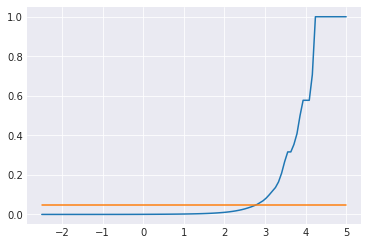

In [261]:
plt.plot(xs, standard_error / empirical_pvals)
plt.plot(xs, [0.05]*len(xs))

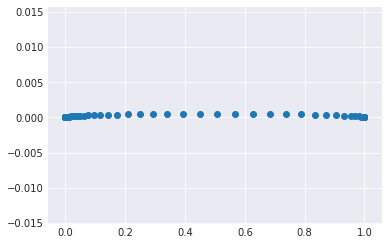

In [255]:
plt.scatter(empirical_pvals, standard_error)

In [251]:
standard_error

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00300802e-06, 2.24278962e-06, 4.01200190e-06,
       7.50561771e-06, 1.26066226e-05, 1.89213479e-05, 2.95376101e-05,
       4.20294875e-05, 5.90064211e-05, 8.02615984e-05, 1.05848249e-04,
       1.36279640e-04, 1.71385080e-04, 2.09775971e-04, 2.50717588e-04,
       2.92169465e-04, 3.33755643e-04, 3.73487112e-04, 4.09363230e-04,
       4.40586704e-04, 4.66056594e-04, 4.84660193e-04, 4.96291711e-04,
       5.00701747e-04, 4.98134359e-04, 4.89054204e-04, 4.74494730e-04,
       4.55101523e-04, 4.32483333e-04, 4.06655149e-04, 3.79073489e-04,
       3.50615386e-04, 3.21644641e-04, 2.93323728e-04, 2.65663000e-04,
       2.38506982e-04, 2.13717529e-04, 1.90502448e-04, 1.69143006e-04,
      

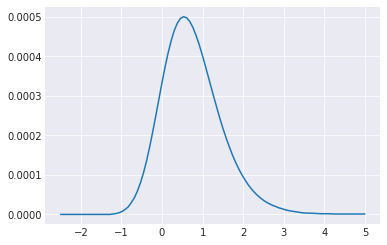

In [252]:
plt.plot(xs, standard_error)


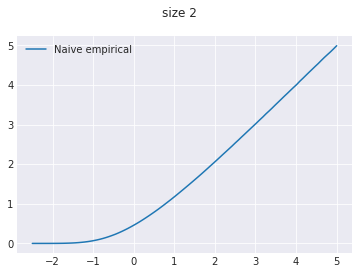

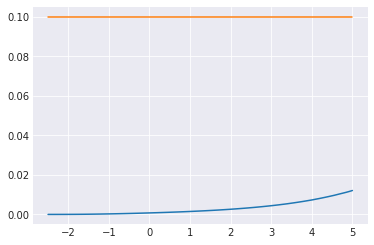

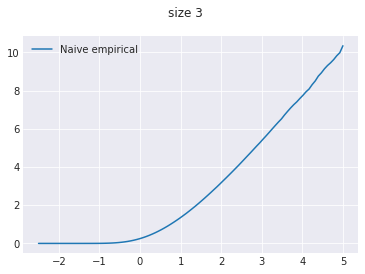

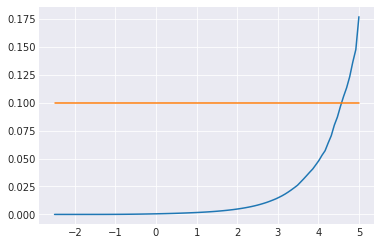

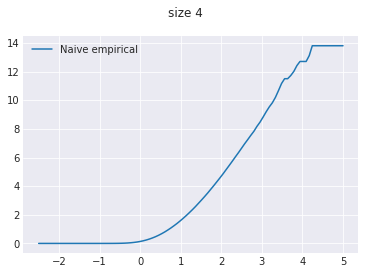

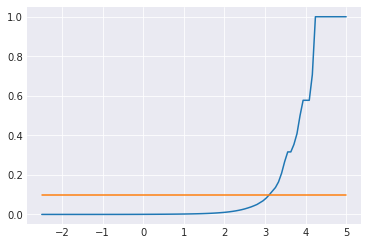

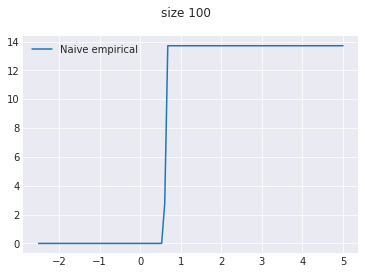

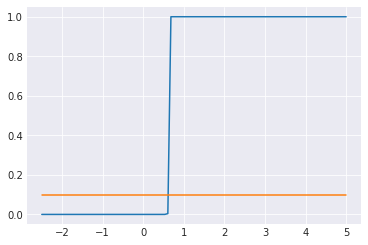

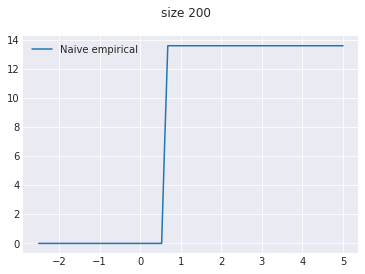

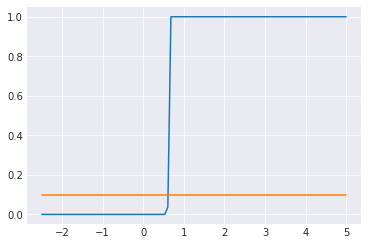

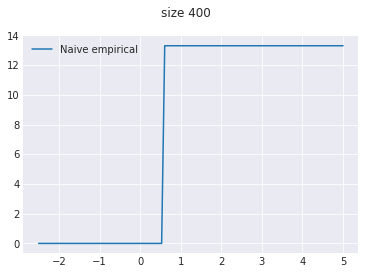

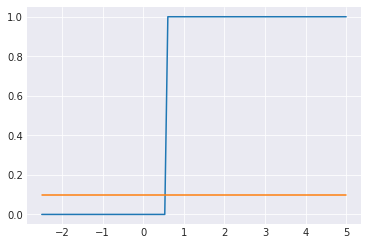

In [265]:
xs = numpy.linspace(-2.5, 5, num=100)

for size in [2,3,4,100,200,400]:
    this_data = ground_truth_shuffled_means[size]
    empirical_pvals = empdist.empirical_pval.compute_empirical_pvalue(data=this_data,
                                                values=xs, tail='right', is_sorted=True)
    
    empirical_pscores = -1 * numpy.log(empirical_pvals)
    
    plt.plot(xs, empirical_pscores, label='Naive empirical')
    
#     this_distro = PiecewiseApproxLinearDirect(*PiecewiseApproxLinearDirect.fit(this_data))
# #     plt.plot(xs, -1 * predicted_mean_distros_pw_linear[size].logsf(xs), label='piecewise linear unsmoothed')
#     plt.plot(xs, -1 * this_distro.logsf(xs), label='piecewise direct')

    plt.suptitle('size {}'.format(size))
    plt.legend()
    plt.show()
    standard_error = sep(empirical_pvals, len(this_data))
    plt.plot(xs, standard_error / empirical_pvals)
    plt.plot(xs, [0.10]*len(xs))   
    plt.show()

# We can use the SEP in multiple ways:

1. For a given empirical distribution of size n, we can compute the value of p at which the SEP / empirical p-value ratio equals some target (say, 0.05), and use this point for fitting.
2. Likewise, given a p-value target and confidence interval size, we can compute the number of permutations needed (as opposed to just basing it on the maximum p-value obtainable.

## Application 1

$$
\begin{align}
SEP &= \sqrt{\frac{p*(1-p)}{n}}\\
EC &= \frac{SEP}{p}\\
p &= \frac{1}{n * EC^2 + 1}
\end{align}
$$


In [296]:
def determine_p_cutoff(n, target_error_coefficient=0.05):
    """
    Given a sample size :param n: and :param target_error_coefficient: that
    specifies the desired ratio of the standard error of the p-value measurement
    to the p-value, return the minimum empirical p-value whose measurement
    is expected to exhibit this or smaller error.
    """
    return 1 / (n * target_error_coefficient**2 + 1)

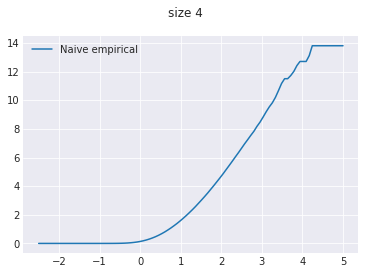

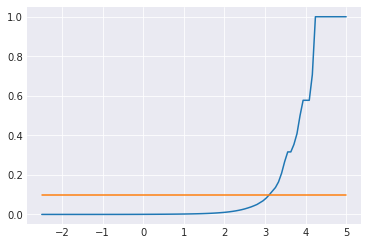

In [275]:
for size in [4]:
    this_data = ground_truth_shuffled_means[size]
    empirical_pvals = empdist.empirical_pval.compute_empirical_pvalue(data=this_data,
                                                values=xs, tail='right', is_sorted=True)
    
    empirical_pscores = -1 * numpy.log(empirical_pvals)
    
    plt.plot(xs, empirical_pscores, label='Naive empirical')
    
#     this_distro = PiecewiseApproxLinearDirect(*PiecewiseApproxLinearDirect.fit(this_data))
# #     plt.plot(xs, -1 * predicted_mean_distros_pw_linear[size].logsf(xs), label='piecewise linear unsmoothed')
#     plt.plot(xs, -1 * this_distro.logsf(xs), label='piecewise direct')

    plt.suptitle('size {}'.format(size))
    plt.legend()
    plt.show()
    standard_error = sep(empirical_pvals, len(this_data))
    plt.plot(xs, standard_error / empirical_pvals)
    plt.plot(xs, [0.10]*len(xs))   
    plt.show()

In [276]:
pandas.Series(empirical_pvals, index=xs)

-2.500000    1.000000
-2.424242    1.000000
-2.348485    1.000000
-2.272727    1.000000
-2.196970    1.000000
-2.121212    1.000000
-2.045455    1.000000
-1.969697    1.000000
-1.893939    1.000000
-1.818182    1.000000
-1.742424    1.000000
-1.666667    1.000000
-1.590909    1.000000
-1.515152    1.000000
-1.439394    1.000000
-1.363636    1.000000
-1.287879    1.000000
-1.212121    0.999999
-1.136364    0.999995
-1.060606    0.999984
-0.984848    0.999944
-0.909091    0.999842
-0.833333    0.999643
-0.757576    0.999129
-0.681818    0.998236
-0.606061    0.996517
-0.530303    0.993536
-0.454545    0.988702
-0.378788    0.981127
-0.303030    0.969803
               ...   
 2.803030    0.000396
 2.878788    0.000281
 2.954545    0.000209
 3.030303    0.000146
 3.106061    0.000101
 3.181818    0.000072
 3.257576    0.000054
 3.333333    0.000037
 3.409091    0.000023
 3.484848    0.000014
 3.560606    0.000010
 3.636364    0.000010
 3.712121    0.000008
 3.787879    0.000006
 3.863636 

In [277]:
determine_p_cutoff(n=len(this_data), target_error_coefficient=0.1)

0.00010029084344599336

## Application 2
2. Likewise, given a p-value target and confidence interval size, we can compute the number of permutations needed (as opposed to just basing it on the maximum p-value obtainable.


$$
\begin{align}
SEP &= \sqrt{\frac{p*(1-p)}{n}}\\
EC &= \frac{SEP}{p}\\
n &= \frac{1-p}{EC^2 p}
\end{align}
$$


In [295]:
1 / 0.05 **2

399.99999999999994

In [284]:
def compute_number_of_permuted_data_points(target_p_value, target_error_coefficient=0.05):
    """
    For a given :param target_p_value: and :param target_error_coefficient: that
    specifies the desired ratio of the standard error of the p-value measurement
    to the p-value, return the minimum number of permutations needed to evaluate
    :param target_p_value: with this or smaller error."""

    return int(numpy.ceil((1 / (target_error_coefficient**2 * target_p_value)) - 1))

In [293]:
n = compute_number_of_permuted_data_points(1e-3) / 500
n

799.998

## Confirm with empirical testing

In [288]:
%%time
reload(peas.scoring)

ground_truth_sep_testing = peas.scoring.generate_permuted_matrix_scores(test_matrix, 
                                                                      num_shuffles=10000,
                                                                      min_region_size=2,
                                                                      max_region_size=500,
                                                                      start_diagonal=1,
                                                                      matrix_score_func=scoring.compute_mean_table_2d,
                                                                      random_seed=1,
                                                                     )

%time ground_truth_sep_testing = {sample_size:numpy.sort(ground_truth_sep_testing[sample_size]) for sample_size in ground_truth_sep_testing}

2018-Aug-27 14:21:52			Setting random seed to 1
2018-Aug-27 14:21:52				permutation 1 of 10000
2018-Aug-27 14:21:58				permutation 49 of 10000
2018-Aug-27 14:22:03				permutation 99 of 10000
2018-Aug-27 14:22:08				permutation 153 of 10000
2018-Aug-27 14:22:13				permutation 210 of 10000
2018-Aug-27 14:22:18				permutation 267 of 10000
2018-Aug-27 14:22:23				permutation 311 of 10000
2018-Aug-27 14:22:28				permutation 357 of 10000
2018-Aug-27 14:22:33				permutation 404 of 10000
2018-Aug-27 14:22:38				permutation 449 of 10000
2018-Aug-27 14:22:43				permutation 494 of 10000
2018-Aug-27 14:22:48				permutation 541 of 10000
2018-Aug-27 14:22:53				permutation 587 of 10000
2018-Aug-27 14:22:58				permutation 633 of 10000
2018-Aug-27 14:23:03				permutation 678 of 10000
2018-Aug-27 14:23:08				permutation 724 of 10000
2018-Aug-27 14:23:13				permutation 771 of 10000
2018-Aug-27 14:23:18				permutation 818 of 10000
2018-Aug-27 14:23:23				permutation 865 of 10000
2018-Aug-27 14:23:28				p

2018-Aug-27 14:35:40				permutation 8084 of 10000
2018-Aug-27 14:35:45				permutation 8135 of 10000
2018-Aug-27 14:35:50				permutation 8186 of 10000
2018-Aug-27 14:35:55				permutation 8239 of 10000
2018-Aug-27 14:36:00				permutation 8292 of 10000
2018-Aug-27 14:36:06				permutation 8346 of 10000
2018-Aug-27 14:36:11				permutation 8400 of 10000
2018-Aug-27 14:36:16				permutation 8452 of 10000
2018-Aug-27 14:36:21				permutation 8505 of 10000
2018-Aug-27 14:36:26				permutation 8554 of 10000
2018-Aug-27 14:36:31				permutation 8604 of 10000
2018-Aug-27 14:36:36				permutation 8651 of 10000
2018-Aug-27 14:36:41				permutation 8701 of 10000
2018-Aug-27 14:36:46				permutation 8753 of 10000
2018-Aug-27 14:36:51				permutation 8803 of 10000
2018-Aug-27 14:36:56				permutation 8853 of 10000
2018-Aug-27 14:37:01				permutation 8903 of 10000
2018-Aug-27 14:37:06				permutation 8954 of 10000
2018-Aug-27 14:37:11				permutation 9005 of 10000
2018-Aug-27 14:37:16				permutation 9055 of 10000


In [298]:
numpy.random.seed()
num_runs = 100
downsampled_shuffles = 100
downsampled_sep_testing = {}
for run in range(num_runs):
    print('*'*80)
    print(run)
    print('*'*80)
    downsampled_sep_testing[run] = peas.scoring.generate_permuted_matrix_scores(test_matrix, 
                                                                      num_shuffles=downsampled_shuffles,
                                                                      min_region_size=2,
                                                                      max_region_size=500,
                                                                      start_diagonal=1,
                                                                      matrix_score_func=scoring.compute_mean_table_2d,
                                                                      random_seed=None,
                                                                     )

********************************************************************************
0
********************************************************************************
2018-Aug-27 15:02:00			Setting random seed to None
2018-Aug-27 15:02:00				permutation 1 of 100
2018-Aug-27 15:02:05				permutation 52 of 100
********************************************************************************
1
********************************************************************************
2018-Aug-27 15:02:10			Setting random seed to None
2018-Aug-27 15:02:10				permutation 1 of 100
2018-Aug-27 15:02:15				permutation 53 of 100
********************************************************************************
2
********************************************************************************
2018-Aug-27 15:02:19			Setting random seed to None
2018-Aug-27 15:02:19				permutation 1 of 100
2018-Aug-27 15:02:25				permutation 49 of 100
2018-Aug-27 15:02:30				permutation 98 of 100
************************************

2018-Aug-27 15:06:21				permutation 48 of 100
2018-Aug-27 15:06:26				permutation 94 of 100
********************************************************************************
25
********************************************************************************
2018-Aug-27 15:06:26			Setting random seed to None
2018-Aug-27 15:06:26				permutation 1 of 100
2018-Aug-27 15:06:31				permutation 42 of 100
2018-Aug-27 15:06:36				permutation 85 of 100
********************************************************************************
26
********************************************************************************
2018-Aug-27 15:06:38			Setting random seed to None
2018-Aug-27 15:06:38				permutation 1 of 100
2018-Aug-27 15:06:43				permutation 48 of 100
2018-Aug-27 15:06:48				permutation 94 of 100
********************************************************************************
27
********************************************************************************
2018-Aug-27 15:06:49			Setting random

2018-Aug-27 15:10:36				permutation 52 of 100
********************************************************************************
49
********************************************************************************
2018-Aug-27 15:10:41			Setting random seed to None
2018-Aug-27 15:10:41				permutation 1 of 100
2018-Aug-27 15:10:46				permutation 53 of 100
********************************************************************************
50
********************************************************************************
2018-Aug-27 15:10:51			Setting random seed to None
2018-Aug-27 15:10:51				permutation 1 of 100
2018-Aug-27 15:10:56				permutation 52 of 100
********************************************************************************
51
********************************************************************************
2018-Aug-27 15:11:01			Setting random seed to None
2018-Aug-27 15:11:01				permutation 1 of 100
2018-Aug-27 15:11:06				permutation 53 of 100
*********************************

2018-Aug-27 15:14:56				permutation 53 of 100
********************************************************************************
75
********************************************************************************
2018-Aug-27 15:15:01			Setting random seed to None
2018-Aug-27 15:15:01				permutation 1 of 100
2018-Aug-27 15:15:06				permutation 54 of 100
********************************************************************************
76
********************************************************************************
2018-Aug-27 15:15:11			Setting random seed to None
2018-Aug-27 15:15:11				permutation 1 of 100
2018-Aug-27 15:15:16				permutation 54 of 100
********************************************************************************
77
********************************************************************************
2018-Aug-27 15:15:20			Setting random seed to None
2018-Aug-27 15:15:20				permutation 1 of 100
2018-Aug-27 15:15:25				permutation 51 of 100
*********************************

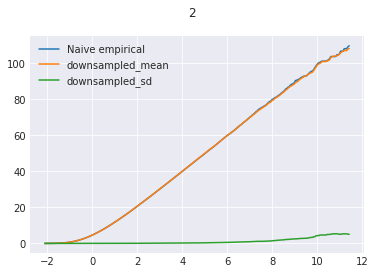

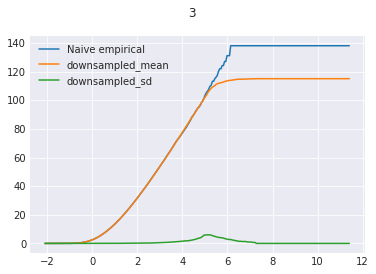

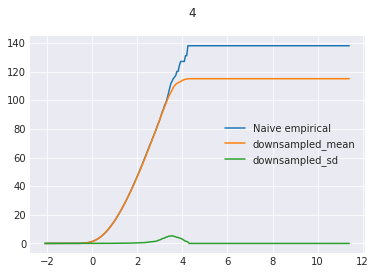

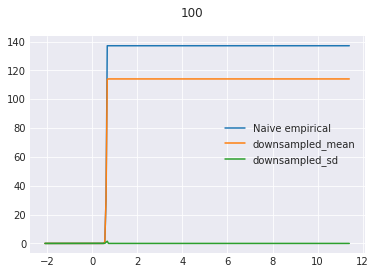

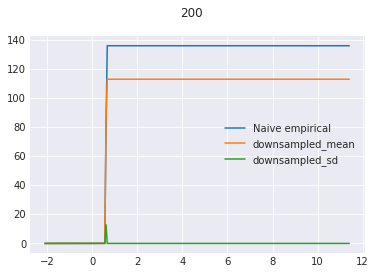

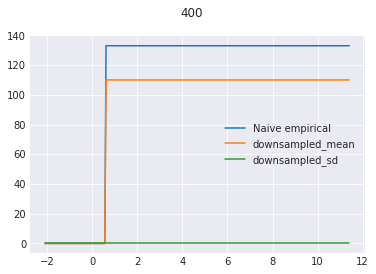

In [311]:
xs = numpy.linspace(ground_truth_means.min(), ground_truth_means.max(), num=250)

for size in [2,3,4,100,200,400]:
    empirical_pval_results = []
    for run in range(100):
        this_data = downsampled_sep_testing[run][size]
        this_empirical_pvals = empdist.empirical_pval.compute_empirical_pvalue(data=this_data,
                                                                   values=xs, tail='right', is_sorted=False)
        empirical_pval_results.append(this_empirical_pvals)
        
    all_empirical_pvals = numpy.vstack(empirical_pval_results)
    
    this_ground_truth = ground_truth_shuffled_means[size]
    gt_empirical_pvals = empdist.empirical_pval.compute_empirical_pvalue(data=this_ground_truth,
                                                values=xs, tail='right', is_sorted=True)
    
    gt_empirical_pscores = -10 * numpy.log(gt_empirical_pvals)
    empirical_pscore_mean = (-10 * numpy.log(all_empirical_pvals)).mean(axis=0)
    empirical_pscore_sd = (-10 * numpy.log(all_empirical_pvals)).std(axis=0)
    
    
    plt.plot(xs, gt_empirical_pscores, label='Naive empirical')
    plt.plot(xs, empirical_pscore_mean, label='downsampled_mean')
    plt.plot(xs, empirical_pscore_sd, label='downsampled_sd')
    plt.legend()
    plt.suptitle(size)
    plt.show()

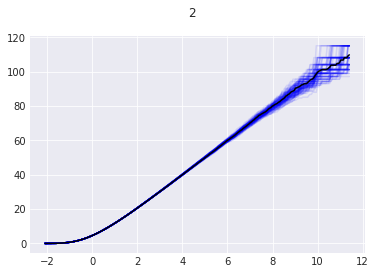

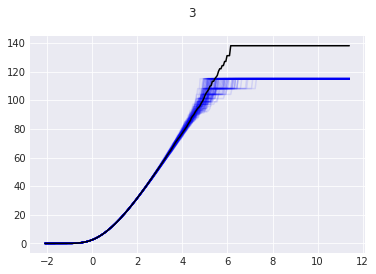

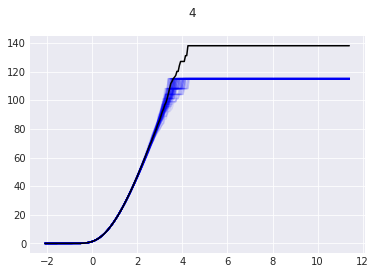

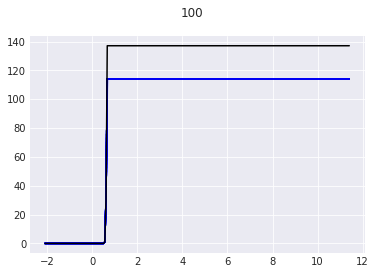

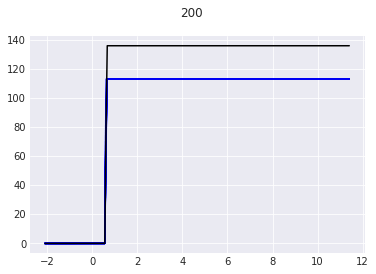

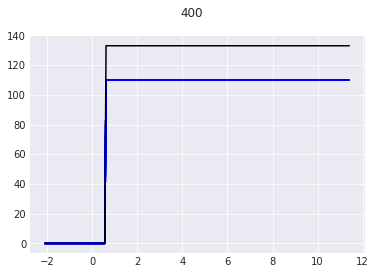

In [309]:
xs = numpy.linspace(ground_truth_means.min(), ground_truth_means.max(), num=250)
for size in [2,3,4,100,200,400]:
    
    empirical_pval_results = []
    for run in range(100):
        this_data = downsampled_sep_testing[run][size]
        this_empirical_pvals = empdist.empirical_pval.compute_empirical_pvalue(data=this_data,
                                                                   values=xs, tail='right', is_sorted=False)
        this_empirical_pscores =  -10 * numpy.log(this_empirical_pvals)
        plt.plot(xs, this_empirical_pscores, color='b', alpha=0.1)
        
    this_ground_truth = ground_truth_shuffled_means[size]
    gt_empirical_pvals = empdist.empirical_pval.compute_empirical_pvalue(data=this_ground_truth,
                                                values=xs, tail='right', is_sorted=True)
    gt_empirical_pscores = -10 * numpy.log(gt_empirical_pvals)
    plt.plot(xs, gt_empirical_pscores, label='Naive empirical', color='k')

    plt.suptitle(size)
    plt.show()

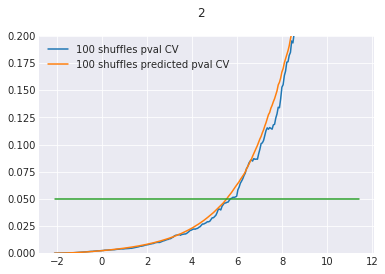

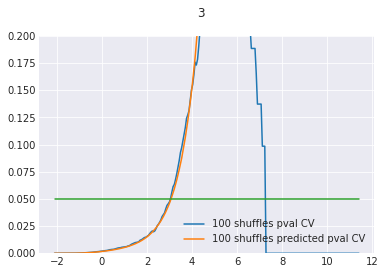

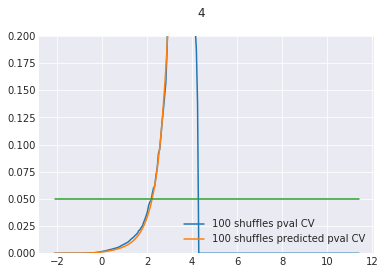

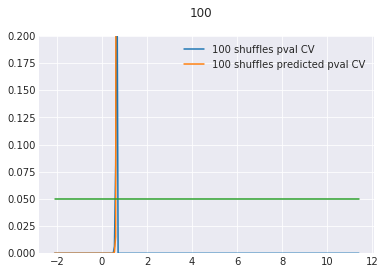

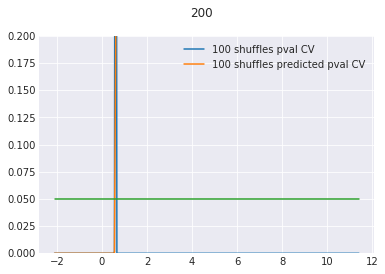

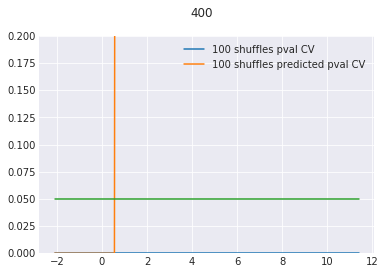

In [316]:
xs = numpy.linspace(ground_truth_means.min(), ground_truth_means.max(), num=250)

for size in [2,3,4,100,200,400]:
    empirical_pval_results = []
     
    for run in range(100):
        this_data = downsampled_sep_testing[run][size]
        this_empirical_pvals = empdist.empirical_pval.compute_empirical_pvalue(data=this_data,
                                                                   values=xs, tail='right', is_sorted=False)
        empirical_pval_results.append(this_empirical_pvals)
        
    all_empirical_pvals = numpy.vstack(empirical_pval_results)
    
    this_ground_truth = ground_truth_shuffled_means[size]
    gt_empirical_pvals = empdist.empirical_pval.compute_empirical_pvalue(data=this_ground_truth,
                                                values=xs, tail='right', is_sorted=True)
    
    empirical_pval_mean = (all_empirical_pvals).mean(axis=0)
    empirical_pval_sd = (all_empirical_pvals).std(axis=0)
    empirical_pval_cv = empirical_pval_sd / empirical_pval_mean
    
    predicted_pval_sd = sep(n=len(downsampled_sep_testing[0][size]), p=empirical_pval_mean)
    predicted_pval_cv = predicted_pval_sd / empirical_pval_mean
    
    plt.plot(xs, empirical_pval_cv, label='100 shuffles pval CV')
    plt.plot(xs, predicted_pval_cv, label='100 shuffles predicted pval CV')

    plt.plot(xs, [0.05]*len(xs))
    plt.legend()
    plt.ylim(0,0.2)
    plt.suptitle(size)
    plt.show()

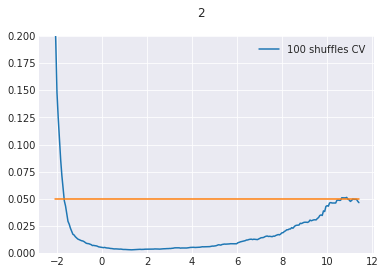

/home/dskola/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning:

invalid value encountered in true_divide



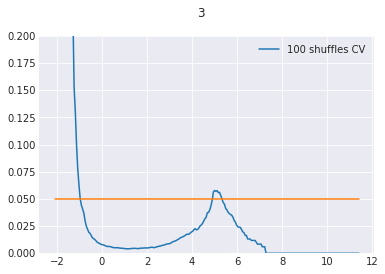

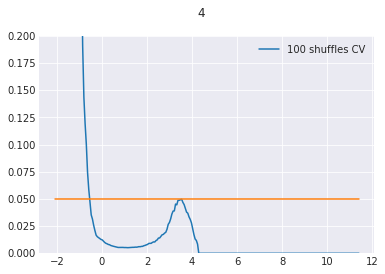

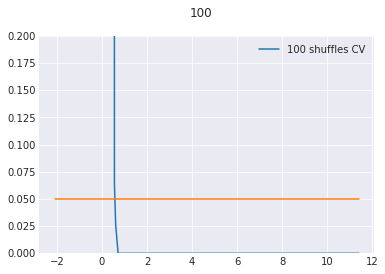

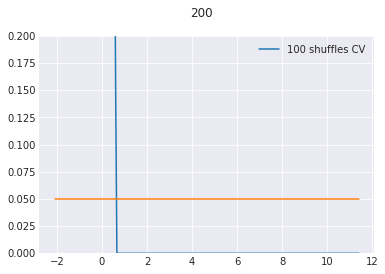

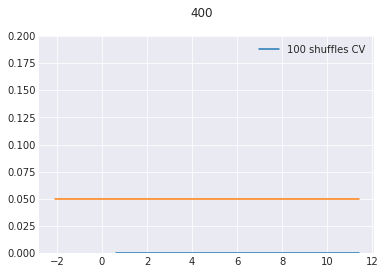

In [314]:
xs = numpy.linspace(ground_truth_means.min(), ground_truth_means.max(), num=250)

for size in [2,3,4,100,200,400]:
    empirical_pval_results = []
    
    predicted_pscore_cv = 
    
    for run in range(100):
        this_data = downsampled_sep_testing[run][size]
        this_empirical_pvals = empdist.empirical_pval.compute_empirical_pvalue(data=this_data,
                                                                   values=xs, tail='right', is_sorted=False)
        empirical_pval_results.append(this_empirical_pvals)
        
    all_empirical_pvals = numpy.vstack(empirical_pval_results)
    
    this_ground_truth = ground_truth_shuffled_means[size]
    gt_empirical_pvals = empdist.empirical_pval.compute_empirical_pvalue(data=this_ground_truth,
                                                values=xs, tail='right', is_sorted=True)
    
    gt_empirical_pscores = -10 * numpy.log(gt_empirical_pvals)
    empirical_pscore_mean = (-10 * numpy.log(all_empirical_pvals)).mean(axis=0)
    empirical_pscore_sd = (-10 * numpy.log(all_empirical_pvals)).std(axis=0)
    empirical_pscore_cv = empirical_pscore_sd / empirical_pscore_mean
    
    plt.plot(xs, empirical_pscore_cv, label='100 shuffles CV')
#     plt.plot(xs, empirical_pscore_mean, label='downsampled_mean')
#     plt.plot(xs, empirical_pscore_sd, label='downsampled_sd')
    
    plt.plot(xs, [0.05]*len(xs))
    plt.legend()
    plt.ylim(0,0.2)
    plt.suptitle(size)
    plt.show()

## Build in SEP computations to empirical distro classes

In [317]:
def determine_p_cutoff(n, target_error_coefficient=0.05):
    """
    Given a sample size :param n: and :param target_error_coefficient: that
    specifies the desired ratio of the standard error of the p-value measurement
    to the p-value, return the minimum empirical p-value whose measurement
    is expected to exhibit this or smaller error.
    """
    return 1 / (n * target_error_coefficient**2 + 1)

In [163]:
import peas
reload(peas)
reload(peas.distributions)
reload(peas.helper_funcs)

<module 'peas.fitapproxdistros.helper_funcs' from '/gpfs/data01/glasslab/home/dskola/workspace/PEAS/peas/fitapproxdistros/helper_funcs.py'>

In [182]:
# DEFAULT_SUPPORT_QUANTILE = 0.8

class PiecewiseApproxLinear:
    """
    Stub class for an empirical distribution with methods to:
        1. Fit a piecewise linear function to the log-survival function of a data sample
        2. Compute the value of the log-survival function for given x.
    """

    def __init__(self, inflection_point, slope):
        self.inflection_point = inflection_point
        self.slope = slope

    @staticmethod
    def _piecewise_logsf(x, inflection_point, slope):
        """
        A piecewise linear function that = 0 for all x < :param:`inflection_point`
            and rises linearly with slope :param:`slope` for all points > :param:`inflection_point`
        """
        return numpy.piecewise(x, [x < inflection_point], [lambda x: 0, lambda x: slope * (x - inflection_point)])

    @classmethod
    def fit(cls, data, is_sorted=False, support_quantile=DEFAULT_SUPPORT_QUANTILE, interp_points=50,
            initial_inflection_point=None, initial_slope=500):
        if not is_sorted:
            data = numpy.sort(data)
            
#         print(data, min_val, max_val)

        min_val, max_val = data.min(), data.max()
        endpoint = (max_val - min_val) * support_quantile + min_val

        support = min_val, endpoint

        if initial_inflection_point == None:
            initial_inflection_point = data.mean()
        # print('min: {} max: {} midpoint: {} extent: {} support: {}'.format(data_min, data_max, midpoint, extent, support))
        print('support: {}, interp_points: {}'.format(support, interp_points))
        fit_xs = numpy.linspace(*support, num=interp_points)
        fit_ys = numpy.log(compute_empirical_pvalue(data, values=fit_xs, tail='right', is_sorted=True))
        p, e = scipy.optimize.curve_fit(cls._piecewise_logsf, fit_xs, fit_ys,
                                        p0=[initial_inflection_point, initial_slope])
        return p

    def logsf(self, x):
        return self._piecewise_logsf(x, self.inflection_point, self.slope)

class PiecewiseApproxLinearDirect:
    """
    Stub class for an empirical distribution with methods to:
        1. Fit a piecewise linear function to the log-survival function of a data sample
        2. Compute the value of the log-survival function for given x.
    """

    def __init__(self, inflection_point, slope):
        self.inflection_point = inflection_point
        self.slope = slope

    @staticmethod
    def _piecewise_logsf(x, inflection_point, slope):
        """
        A piecewise linear function that = 0 for all x < :param:`inflection_point`
            and rises linearly with slope :param:`slope` for all points > :param:`inflection_point`
        """
        return numpy.piecewise(x, [x < inflection_point], [lambda x: 0, lambda x: slope * (x - inflection_point)])

    @classmethod
    def fit(cls, data, is_sorted=False, support_quantile=DEFAULT_SUPPORT_QUANTILE):
        inflection_point = data.mean()
        # print('min: {} max: {} midpoint: {} extent: {} support: {}'.format(data_min, data_max, midpoint, extent, support))
        min_val, max_val = data.min(), data.max()
        endpoint = (max_val - min_val) * support_quantile + min_val
        print(min_val, max_val, endpoint)

        fit_xs = [inflection_point, endpoint]
        fit_ys = [0, numpy.log(compute_empirical_pvalue(data, values=endpoint, tail='right', is_sorted=is_sorted))]
                
        slope = (fit_ys[1] - fit_ys[0]) / (fit_xs[1] - fit_xs[0])
        print(fit_xs, fit_ys, slope)
        
        return inflection_point, slope
    

    def logsf(self, x):
        return self._piecewise_logsf(x, self.inflection_point, self.slope)


In [183]:
x = numpy.arange(25).reshape((5,5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [173]:
x.min()

0

In [184]:
ground_truth_shuffled_means

{2: array([[ 0.20100343,  0.93812326,  0.90735891, ...,  1.17395294,
          1.24284495,  1.12623144],
        [ 1.97063083,  0.10061907,  1.24547146, ...,  0.07960953,
          0.62053747,  1.14025606],
        [ 0.87828088,  0.78513389,  0.83793213, ..., -0.22056097,
         -0.03058322,  1.19966776],
        ...,
        [ 3.48109454, -0.39987479, -0.5941968 , ...,  1.00995642,
         -1.05800251, -0.12257083],
        [ 0.26897691,  0.57217991,  1.58305015, ..., -0.6703161 ,
         -0.26206522,  1.48081797],
        [ 2.26812244,  2.74206995,  1.09646997, ...,  0.38386807,
          1.22024087,  0.76026184]]),
 3: array([[ 0.67426642,  0.6578088 ,  1.36643533, ...,  0.60510122,
          1.45086738,  0.93036497],
        [ 1.00522063,  0.66866134,  0.50416407, ..., -0.04630162,
          0.48050538,  0.68656143],
        [ 1.42541963,  0.59266761,  0.80405822, ..., -0.05477559,
          0.05854601,  0.851183  ],
        ...,
        [ 1.59674588, -0.20581657,  0.87325202, 

In [226]:
%%time
distro_class = PiecewiseApproxLinear
distro_pw_linear_params = peas.helper_funcs.fit_distros(ground_truth_shuffled_means,
                                               distribution_class=distro_class, 
                                                           filter_window_size=None)
predicted_mean_distros_pw_linear = {size:distro_class(*params) for size, params in distro_pw_linear_params.items()}

support: (-2.6360560500876016, 10.874804692242455), interp_points: 50
2018-Aug-27 12:38:40			size: 2 fit parameters: [-0.23519213 -0.96152535]
support: (-1.7825789010008697, 4.537515671772435), interp_points: 50
2018-Aug-27 12:38:41			size: 3 fit parameters: [ 0.41907933 -2.13407897]
support: (-1.2362652148524003, 3.121456278329779), interp_points: 50
2018-Aug-27 12:38:41			size: 4 fit parameters: [ 0.55569551 -3.43145734]
support: (-0.9496979111784715, 2.391097227753793), interp_points: 50
2018-Aug-27 12:38:41			size: 5 fit parameters: [ 0.58009633 -4.68377328]
support: (-0.6804807386926376, 1.9021107708201082), interp_points: 50
2018-Aug-27 12:38:41			size: 6 fit parameters: [ 0.56330599 -5.67298879]
support: (-0.5035091604541468, 1.618872297537396), interp_points: 50
2018-Aug-27 12:38:42			size: 7 fit parameters: [ 0.56055644 -6.69114953]
support: (-0.3857913799123726, 1.4724190910777362), interp_points: 50
2018-Aug-27 12:38:42			size: 8 fit parameters: [ 0.57450818 -7.96804444]
sup

2018-Aug-27 12:38:54			size: 58 fit parameters: [  0.57628566 -61.53504224]
support: (0.4438125058543834, 0.6670226610841223), interp_points: 50
2018-Aug-27 12:38:54			size: 59 fit parameters: [  0.57631525 -61.88923541]
support: (0.4464646052655087, 0.6637169972521795), interp_points: 50
2018-Aug-27 12:38:54			size: 60 fit parameters: [  0.57552665 -61.70252126]
support: (0.4499464820324004, 0.6635553387476545), interp_points: 50
2018-Aug-27 12:38:55			size: 61 fit parameters: [  0.5764447  -64.01171951]
support: (0.45176730645923174, 0.6584942288232961), interp_points: 50
2018-Aug-27 12:38:55			size: 62 fit parameters: [  0.57465346 -62.23587548]
support: (0.4552717823605236, 0.6595615823507581), interp_points: 50
2018-Aug-27 12:38:55			size: 63 fit parameters: [  0.57436314 -63.49932461]
support: (0.4586019348326792, 0.6618749500262606), interp_points: 50
2018-Aug-27 12:38:55			size: 64 fit parameters: [  0.57638476 -67.69773491]
support: (0.45777142810810934, 0.656500688667951), in

2018-Aug-27 12:39:06			size: 115 fit parameters: [   0.57588208 -112.95148917]
support: (0.5113495309570912, 0.6195923781733587), interp_points: 50
2018-Aug-27 12:39:07			size: 116 fit parameters: [   0.57586624 -114.30935828]
support: (0.5113392484681791, 0.6186042454627922), interp_points: 50
2018-Aug-27 12:39:07			size: 117 fit parameters: [   0.57546865 -113.14583257]
support: (0.5138280722809805, 0.6182368418913765), interp_points: 50
2018-Aug-27 12:39:07			size: 118 fit parameters: [   0.57582058 -115.41887055]
support: (0.5166648403084289, 0.618711622973829), interp_points: 50
2018-Aug-27 12:39:07			size: 119 fit parameters: [   0.57574123 -116.74288933]
support: (0.5163914443294024, 0.6186208289569164), interp_points: 50
2018-Aug-27 12:39:08			size: 120 fit parameters: [   0.57575694 -118.02698095]
support: (0.5175675916093704, 0.6194102007836456), interp_points: 50
2018-Aug-27 12:39:08			size: 121 fit parameters: [   0.57645254 -122.87887835]
support: (0.5173267317783242, 0.61

2018-Aug-27 12:39:18			size: 171 fit parameters: [   0.57682011 -171.33363347]
support: (0.5304171585679501, 0.605842899862485), interp_points: 50
2018-Aug-27 12:39:18			size: 172 fit parameters: [   0.57684556 -172.33862662]
support: (0.5315622746628573, 0.6062907719520418), interp_points: 50
2018-Aug-27 12:39:19			size: 173 fit parameters: [   0.57731794 -178.68275655]
support: (0.532105894925651, 0.6067546088699027), interp_points: 50
2018-Aug-27 12:39:19			size: 174 fit parameters: [   0.57703658 -178.63244387]
support: (0.5329708172853447, 0.606306833332225), interp_points: 50
2018-Aug-27 12:39:19			size: 175 fit parameters: [   0.57700474 -178.73118869]
support: (0.532546325664577, 0.6059905875194411), interp_points: 50
2018-Aug-27 12:39:19			size: 176 fit parameters: [   0.57680907 -177.58470574]
support: (0.5325544722041259, 0.6055205397420158), interp_points: 50
2018-Aug-27 12:39:19			size: 177 fit parameters: [   0.57726152 -181.90047168]
support: (0.5331004766466023, 0.60582

2018-Aug-27 12:39:29			size: 227 fit parameters: [   0.57826044 -256.14930905]
support: (0.5439333097776754, 0.6013944657695929), interp_points: 50
2018-Aug-27 12:39:29			size: 228 fit parameters: [   0.57828548 -257.86610426]
support: (0.5446882639152448, 0.6010695836635691), interp_points: 50
2018-Aug-27 12:39:30			size: 229 fit parameters: [   0.57828164 -258.22731156]
support: (0.5451387792438461, 0.6007870170285377), interp_points: 50
2018-Aug-27 12:39:30			size: 230 fit parameters: [   0.57824094 -258.01957551]
support: (0.54470596597114, 0.6010655213488053), interp_points: 50
2018-Aug-27 12:39:30			size: 231 fit parameters: [   0.57834088 -262.50455213]
support: (0.5444231232586038, 0.6007376556638226), interp_points: 50
2018-Aug-27 12:39:30			size: 232 fit parameters: [   0.57814571 -259.44163969]
support: (0.5446835554384043, 0.6004045708605352), interp_points: 50
2018-Aug-27 12:39:30			size: 233 fit parameters: [   0.57804629 -258.02404835]
support: (0.5446774448885217, 0.600

2018-Aug-27 12:39:39			size: 283 fit parameters: [   0.57688086 -272.93475116]
support: (0.5528071713913616, 0.5944865796960518), interp_points: 50
2018-Aug-27 12:39:39			size: 284 fit parameters: [   0.57706762 -280.40008131]
support: (0.553557266274826, 0.5942852875569931), interp_points: 50
2018-Aug-27 12:39:40			size: 285 fit parameters: [   0.57712538 -281.93274628]
support: (0.5533185997183, 0.5940867007385), interp_points: 50
2018-Aug-27 12:39:40			size: 286 fit parameters: [   0.57700158 -279.23533719]
support: (0.5533537303152927, 0.5939273274859029), interp_points: 50
2018-Aug-27 12:39:40			size: 287 fit parameters: [   0.57693955 -277.93448927]
support: (0.5531388034534177, 0.5937323185547867), interp_points: 50
2018-Aug-27 12:39:40			size: 288 fit parameters: [   0.57718608 -284.06892212]
support: (0.552874418102057, 0.5935313126368581), interp_points: 50
2018-Aug-27 12:39:40			size: 289 fit parameters: [   0.57705232 -280.84592589]
support: (0.5531467971775008, 0.593543162

2018-Aug-27 12:39:49			size: 339 fit parameters: [   0.57732039 -343.02971958]
support: (0.5571752231030369, 0.5918621741506641), interp_points: 50
2018-Aug-27 12:39:49			size: 340 fit parameters: [   0.57735295 -345.41015627]
support: (0.5568992850043448, 0.5915930231631826), interp_points: 50
2018-Aug-27 12:39:49			size: 341 fit parameters: [   0.57749135 -349.3554734 ]
support: (0.5566187180688138, 0.5912957332424424), interp_points: 50
2018-Aug-27 12:39:49			size: 342 fit parameters: [   0.57729721 -341.22825944]
support: (0.5568317956886786, 0.5913335302711183), interp_points: 50
2018-Aug-27 12:39:49			size: 343 fit parameters: [   0.57736859 -345.56049814]
support: (0.5567014351856286, 0.5912546657589389), interp_points: 50
2018-Aug-27 12:39:50			size: 344 fit parameters: [   0.57731682 -344.38441311]
support: (0.5568915361639926, 0.5915795999251063), interp_points: 50
2018-Aug-27 12:39:50			size: 345 fit parameters: [   0.5775376  -356.89621768]
support: (0.5571703121474627, 0.5

2018-Aug-27 12:39:57			size: 395 fit parameters: [   0.57719909 -385.2200408 ]
support: (0.5597687051139987, 0.5891109089286682), interp_points: 50
2018-Aug-27 12:39:58			size: 396 fit parameters: [   0.577322   -394.29285556]
support: (0.560045859153585, 0.5888544606390744), interp_points: 50
2018-Aug-27 12:39:58			size: 397 fit parameters: [   0.57725273 -389.48209049]
support: (0.5600327020986183, 0.5887467065646736), interp_points: 50
2018-Aug-27 12:39:58			size: 398 fit parameters: [   0.57720601 -387.35158557]
support: (0.5599458157938694, 0.5889278795462717), interp_points: 50
2018-Aug-27 12:39:58			size: 399 fit parameters: [   0.57728758 -394.5196283 ]
support: (0.5596337502496135, 0.588833728879869), interp_points: 50
2018-Aug-27 12:39:58			size: 400 fit parameters: [   0.57719555 -390.29724251]
support: (0.5596694262116266, 0.5884766506475345), interp_points: 50
2018-Aug-27 12:39:58			size: 401 fit parameters: [   0.57703054 -379.42340454]
support: (0.5601342516790857, 0.588

2018-Aug-27 12:40:06			size: 452 fit parameters: [   0.5778446  -496.42042554]
support: (0.5628489307004659, 0.5888107611180965), interp_points: 50
2018-Aug-27 12:40:06			size: 453 fit parameters: [   0.57781745 -494.90151043]
support: (0.5628958550129015, 0.5887997498363406), interp_points: 50
2018-Aug-27 12:40:06			size: 454 fit parameters: [   0.57782585 -496.77636612]
support: (0.5630786274870739, 0.5889005298058131), interp_points: 50
2018-Aug-27 12:40:06			size: 455 fit parameters: [   0.57790119 -503.98048788]
support: (0.5631012773549255, 0.588879138090053), interp_points: 50
2018-Aug-27 12:40:06			size: 456 fit parameters: [   0.5779014  -505.19679122]
support: (0.5629962968817686, 0.5885250967682609), interp_points: 50
2018-Aug-27 12:40:06			size: 457 fit parameters: [   0.5777356  -491.39824422]
support: (0.5631348322387966, 0.5884730630378547), interp_points: 50
2018-Aug-27 12:40:06			size: 458 fit parameters: [   0.57774507 -493.040258  ]
support: (0.5630176171995372, 0.58

In [227]:
param_df = pandas.DataFrame(distro_pw_linear_params, index=['inflection_point', 'slope']).T
param_df.index.name = 'sample_size'

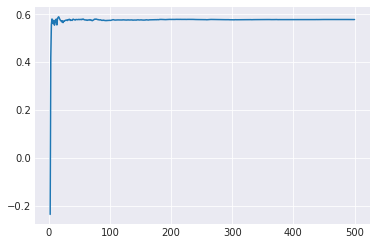

In [228]:
plt.plot(param_df['inflection_point'])

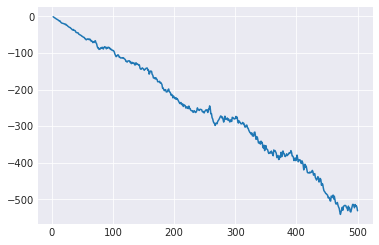

In [232]:
plt.plot(param_df['slope'])

## Try fitting directly

In [159]:
reload(empdist.empirical_pval )

from empdist.empirical_pval import compute_empirical_pvalue

(array([  1000.,      0.,      0.,      0.,      0.,      0.,      0.,
          1127., 664222., 234651.]),
 array([0.        , 0.06553265, 0.1310653 , 0.19659794, 0.26213059,
        0.32766324, 0.39319589, 0.45872854, 0.52426119, 0.58979383,
        0.65532648]),
 <a list of 10 Patch objects>)

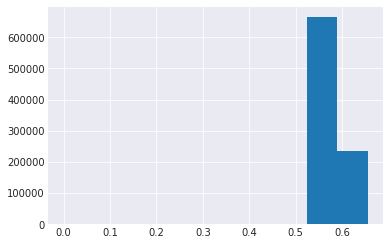

In [129]:
plt.hist(this_data)


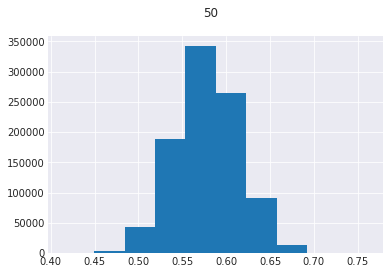

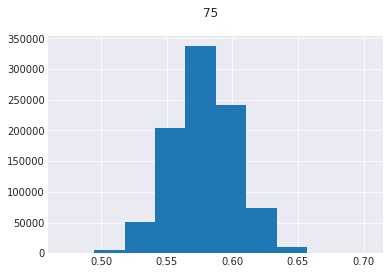

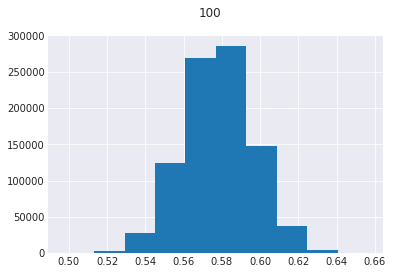

In [230]:
for size in [50,75, 100]:

    this_data = ground_truth_shuffled_means[size]
    plt.hist(this_data)
    plt.suptitle(size)
    plt.show()

-2.6360560500876016 14.25251987782497 10.874804692242455
[0.5788474505067828, 10.874804692242455] [0, -10.482306548455986] -1.0180992696788727


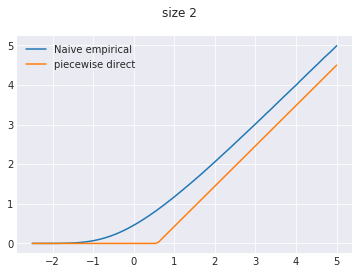

-1.7825789010008697 6.117539314965761 4.537515671772435
[0.5786850871043524, 4.537515671772435] [0, -9.095010686002013] -2.2973983077794573


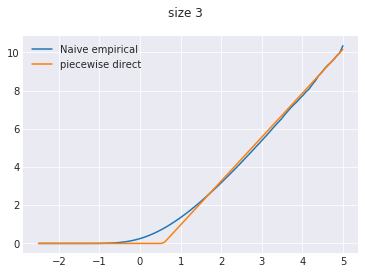

-1.2362652148524003 4.210886651625324 3.121456278329779
[0.5783818736384552, 3.121456278329779] [0, -9.237796073449116] -3.632530788878115


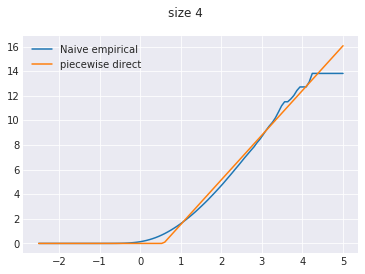

0.49735017720428454 0.6563717768231978 0.6245674568994152
[0.5782420698063682, 0.6245674568994152] [0, -5.191072946071737] -112.05676351166133


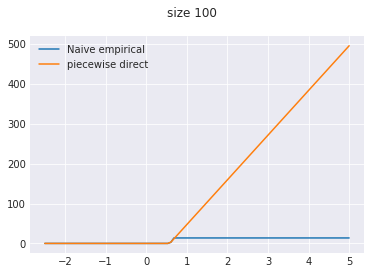

0.5369799477792019 0.621936066371463 0.6049448426530109
[0.5782588404136592, 0.6049448426530109] [0, -6.583305607181939] -246.69508561586156


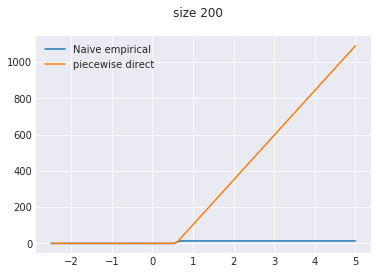

0.5596337502496135 0.5961337235374329 0.588833728879869
[0.5782342918205219, 0.588833728879869] [0, -5.0083102160379065] -472.5071895795964


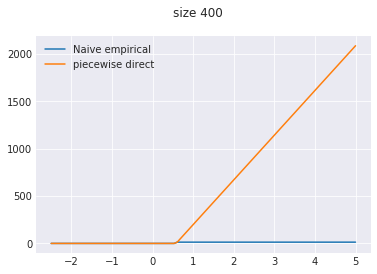

In [233]:
xs = numpy.linspace(-2.5, 5, num=100)

for size in [2,3,4,100,200,400]:
# for size in [50,75, 100]:

    this_data = ground_truth_shuffled_means[size]
    empirical_pvals = empdist.empirical_pval.compute_empirical_pvalue(data=this_data,
                                                values=xs, tail='right', is_sorted=True)
    empirical_pscores = -1 * numpy.log(empirical_pvals)
    
    plt.plot(xs, empirical_pscores, label='Naive empirical')
    this_distro = PiecewiseApproxLinearDirect(*PiecewiseApproxLinearDirect.fit(this_data))
#     plt.plot(xs, -1 * predicted_mean_distros_pw_linear[size].logsf(xs), label='piecewise linear unsmoothed')
    plt.plot(xs, -1 * this_distro.logsf(xs), label='piecewise direct')

    plt.suptitle('size {}'.format(size))
    plt.legend()
    plt.show()

# End development

In [ ]:
%%time
distro_class = scipy.stats.norm
distro_params = peas.helper_funcs.fit_distros(ground_truth_shuffled_means,
                                               distribution_class=distro_class, 
                                                           filter_window_size=5)
predicted_mean_distros_norm = {size:distro_class(*params) for size, params in distro_params.items()}

In [22]:
predicted_mean_distros_norm = peas.helper_funcs.fit_distros(ground_truth_shuffled_means,
                                                       scipy.stats.norm, 
                                                       filter_window_size=5)

2018-Aug-25 15:07:17			size: 2 fit parameters: (0.5788474505067827, 1.2851915357580999)
2018-Aug-25 15:07:17			size: 3 fit parameters: (0.5786850871043521, 0.7416064561401845)
2018-Aug-25 15:07:17			size: 4 fit parameters: (0.5783818736384551, 0.52402956996005)
2018-Aug-25 15:07:17			size: 5 fit parameters: (0.5783506150690113, 0.4054470094018255)
2018-Aug-25 15:07:17			size: 6 fit parameters: (0.5784939849010283, 0.3310909404886112)
2018-Aug-25 15:07:17			size: 7 fit parameters: (0.5786139853678647, 0.27981850146358794)
2018-Aug-25 15:07:17			size: 8 fit parameters: (0.5786717899516061, 0.2422944725879773)
2018-Aug-25 15:07:17			size: 9 fit parameters: (0.5787032721750642, 0.21370774985881458)
2018-Aug-25 15:07:17			size: 10 fit parameters: (0.5787336349806593, 0.19120412378227666)
2018-Aug-25 15:07:17			size: 11 fit parameters: (0.5787525292154785, 0.17300689085866672)
2018-Aug-25 15:07:17			size: 12 fit parameters: (0.5787488646036565, 0.15798992202619505)
2018-Aug-25 15:07:17			siz

2018-Aug-25 15:07:18			size: 114 fit parameters: (0.5782451035823861, 0.01602835202071621)
2018-Aug-25 15:07:18			size: 115 fit parameters: (0.5782461016780076, 0.015888626556022495)
2018-Aug-25 15:07:18			size: 116 fit parameters: (0.5782477498955624, 0.015750513701940666)
2018-Aug-25 15:07:18			size: 117 fit parameters: (0.5782491487995768, 0.015614937530389096)
2018-Aug-25 15:07:18			size: 118 fit parameters: (0.578250517990473, 0.015481090313350286)
2018-Aug-25 15:07:18			size: 119 fit parameters: (0.578251629026247, 0.015350323249959634)
2018-Aug-25 15:07:18			size: 120 fit parameters: (0.5782524641966684, 0.015221713236137647)
2018-Aug-25 15:07:18			size: 121 fit parameters: (0.5782529451012692, 0.015095369092085439)
2018-Aug-25 15:07:18			size: 122 fit parameters: (0.5782533374517133, 0.014971380815635406)
2018-Aug-25 15:07:18			size: 123 fit parameters: (0.5782537124107916, 0.014849039996654175)
2018-Aug-25 15:07:18			size: 124 fit parameters: (0.5782543376144406, 0.01472892818

2018-Aug-25 15:07:18			size: 246 fit parameters: (0.5782590523355124, 0.007301990296275328)
2018-Aug-25 15:07:18			size: 247 fit parameters: (0.5782589639515641, 0.007271317799235737)
2018-Aug-25 15:07:18			size: 248 fit parameters: (0.5782589067264043, 0.007240910717248892)
2018-Aug-25 15:07:18			size: 249 fit parameters: (0.578258908385457, 0.0072107100443952726)
2018-Aug-25 15:07:18			size: 250 fit parameters: (0.5782589185470134, 0.007180953952243777)
2018-Aug-25 15:07:18			size: 251 fit parameters: (0.578258897488029, 0.007151296497588468)
2018-Aug-25 15:07:18			size: 252 fit parameters: (0.5782587670687103, 0.0071218000007031695)
2018-Aug-25 15:07:18			size: 253 fit parameters: (0.5782585622126002, 0.007092625647284182)
2018-Aug-25 15:07:18			size: 254 fit parameters: (0.5782583832491239, 0.00706362361868819)
2018-Aug-25 15:07:18			size: 255 fit parameters: (0.5782582132301816, 0.007034840956651571)
2018-Aug-25 15:07:18			size: 256 fit parameters: (0.5782579556177301, 0.007006307

2018-Aug-25 15:07:19			size: 404 fit parameters: (0.5782333813492643, 0.004285998678138415)
2018-Aug-25 15:07:19			size: 405 fit parameters: (0.5782331380243346, 0.004274567612606676)
2018-Aug-25 15:07:19			size: 406 fit parameters: (0.5782328905987487, 0.00426313639846056)
2018-Aug-25 15:07:19			size: 407 fit parameters: (0.5782326350951483, 0.004251763084306876)
2018-Aug-25 15:07:19			size: 408 fit parameters: (0.5782323827217962, 0.004240422160591269)
2018-Aug-25 15:07:19			size: 409 fit parameters: (0.5782321228545719, 0.004229092740743781)
2018-Aug-25 15:07:19			size: 410 fit parameters: (0.5782319039906317, 0.004217787837494451)
2018-Aug-25 15:07:19			size: 411 fit parameters: (0.578231682731948, 0.004206572792642279)
2018-Aug-25 15:07:19			size: 412 fit parameters: (0.5782314475477938, 0.004195430572362454)
2018-Aug-25 15:07:19			size: 413 fit parameters: (0.5782312041392903, 0.004184304966488309)
2018-Aug-25 15:07:19			size: 414 fit parameters: (0.578230965131275, 0.00417323080

size: 2, mean 0.5788474505067827
size: 3, mean 0.5786850871043521
size: 4, mean 0.5783818736384551
size: 5, mean 0.5783506150690113
size: 10, mean 0.5787336349806593


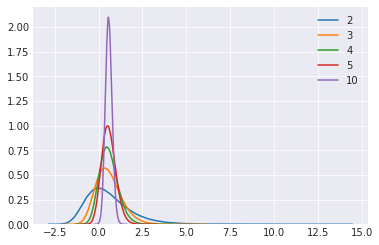

In [27]:
SIZES = [2, 3, 4, 5, 10]
for size in SIZES:
    seaborn.kdeplot(ground_truth_shuffled_means[size], label=size)
    print('size: {}, mean {}'.format(size, ground_truth_shuffled_means[size].mean()))
plt.legend()

### Compute p-score from:
    1. Empirical
    2. Normal approximation
    3. Linear approximation
    4. Power approximation
    

In [51]:
xs = numpy.linspace(test_matrix.min(), test_matrix.max(), num=100)

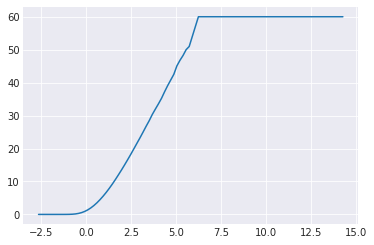

In [58]:
pvals = empdist.empirical_pval.compute_empirical_pvalue(data=ground_truth_shuffled_means[2],
                                                values=xs, tail='right', is_sorted=True)
pscores = -10 * numpy.log10(pvals)
plt.plot(xs, pscores)

In [59]:
mean_pscores = {}



for size in SIZES:
    this_size_results = {}
    # empirical
    pvals = empdist.empirical_pval.compute_empirical_pvalue(data=ground_truth_shuffled_means[2],
                                                values=xs, tail='right', is_sorted=True)
    pscores = -10 * numpy.log10(pvals)
    this_size_results['empirical'] = pscores
    
    # normal
    pscores = 10 * predicted_mean_distros_norm[size].logsf(xs)


AttributeError: 'list' object has no attribute 'logsf'

In [60]:
predicted_mean_distros_norm[size]

[0.5787600828932954, 1.1063452298052208]